Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 1.2) 멕시코풍 프랜차이즈 Chipotle의 주문 데이터 분석하기

### 바로가기

- [<Step1. 탐색> : 데이터의 기초 정보 살펴보기](#<Step1.-탐색>-:-데이터의-기초-정보-살펴보기)
    - [Chipotle 데이터셋의 기본 정보]
    - [Chipotle 데이터셋의 행과 열, 데이터]
    - [Chipotle 데이터셋의 수치적 특징 파악]
- [<Step2. 인사이트의 발견> : 탐색과 시각화](#<Step2.-인사이트의-발견>-:-탐색과-시각화)
    - [가장 많이 주문한 item]
    - [item당 주문 개수와 총량 구하기]
    - [시각화로 분석 결과 살펴보기]
- [<Step3. 데이터 전처리> : 나만의 조력자를 정의하자](#<Step3.-데이터-전처리>-:-나만의-조력자를-정의하자)
    - [apply와 lambda 함수를 이용한 데이터 전처리]
- [<Step4. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색](#<Step4.-탐색적-분석>-:-스무고개로-분석하는-개념적-탐색)
    - [주문당 평균 계산금액 출력하기]
    - [한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기]
    - [각 아이템의 가격 구하기]
    - [가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기]
    - [“Veggie Salad Bowl”이 몇 번 주문되었는지 구하기]
    - [“Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기]

-----

# <Step1. 탐색> : 데이터의 기초 정보 살펴보기

### [Chipotle 데이터셋의 기본 정보]
- 불러오기

In [61]:
# -*- coding: utf-8 -*-
import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
file_path = '../data/chipotle.tsv'

# read_csv 함수는 DataFrame 자료구조를 반환한다.
# read_csv 함수의 2번째 인자 sep의 default 는 ','이다. csv 파일은 , 로 구분하기 때문에 상관없지만,
# tab 으로 구분하는 tsv 파일은 sep = '\t' 로 인자를 설정해줘야 한다.
chipo = pd.read_csv(file_path, sep = '\t')
# chipo 는 dataframe 객체가 됨

In [2]:
print(chipo.shape) # 행수, 열수
print("------------------------------------")
chipo.info() # df 의 정보들 표출

(4622, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


-----

### [Chipotle 데이터셋의 행과 열, 데이터]

In [3]:
chipo # 테이블 형태로 보여줌

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [4]:
# chipo 라는 Dataframe에서 순서대로 10개의 row 데이터를 보여줍니다.
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [7]:
print(chipo.columns)
print("------------------------------------")
print(chipo.index)
print('---------------------------')
print(chipo['item_name'])

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------
RangeIndex(start=0, stop=4622, step=1)
---------------------------
0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object


-----

##### 이제 데이터의 수치적 특징 탐색을 위한 간단한 질문들을 정의합니다.

- quantity와 item_price의 요약 통계
- order_id와 item_name의 개수

### [Chipotle 데이터셋의 수치적 특징 파악]

##### describe 함수로 요약 통계량 출력하기

In [6]:
# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환합니다.
chipo['order_id'] = chipo['order_id'].astype(str) 

In [7]:
print(chipo.describe()) # chipo dataframe에서 수치형 피처들의 요약 통계량을 확인합니다.

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


-----

##### unique 함수로 범주형 피처의 개수 출력하기

In [8]:
print(len(chipo['order_id'].unique())) # order_id의 개수를 출력합니다.
print(len(chipo['item_name'].unique())) # item_name의 개수를 출력합니다.

1834
50


-----

# <Step2. 인사이트의 발견> : 탐색과 시각화

-----
##### 다음으로, 인사이트를 발견할 수 있을만한 개념적 질문들을 정의합니다.

- 가장 많이 주문한 item은 무엇인지
- item당 주문의 총량은 얼마인지

### [가장 많이 주문한 item]

In [9]:
# 가장 많이 주문한 item : top 10을 출력합니다.
# 
item_count = chipo['item_name'].value_counts()[:10]

print('-')
print(chipo.value_counts('item_name')[:10])
print('-----------------')
# item_name 칼럼의 개수 내림차순된 Data Frame
print(item_count.index)
print('------------')

# idx 는 1 부터 시작
# iteritems 는 Series 를 (idx, val) 튜플들로 하나씩 반복하는 것
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)
print('--------------------')

# dirty coding
num = 1
for i in item_count.iteritems():
    print('Top', num, ':', i[0])
    num += 1
print('------------------')

for idx, (col,cnt) in enumerate(item_count.iteritems(), 1):
    print('Top', idx, ':', col, cnt)

-
item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
dtype: int64
-----------------
Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips',
       'Bottled Water', 'Chicken Soft Tacos', 'Chicken Salad Bowl'],
      dtype='object')
------------
Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110
--------------------
Top 1 : Chicken Bowl
Top 2 : Chicken Burrito
Top 3 : Chips and Guacamole
Top 4 : Steak Burrito
Top 5 : Canned Soft Drink
Top 6 : Steak Bowl
Top 7 : Chips
Top 

## pandas.Index
: Immutable ndarray implementing an ordered, sliceable set. The basic object storing axis labels for all pandas objects.

In [47]:
tmp_idx = chipo['item_name'].value_counts().index[0]
print(type(tmp_idx))

<class 'str'>


In [55]:
tmp_idx = chipo['item_name'].value_counts().index
print(type(tmp_idx))
print(tmp_idx)

<class 'pandas.core.indexes.base.Index'>
Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Chips', 'Steak Bowl',
       'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa',
       'Chicken Salad Bowl', 'Canned Soda', 'Side of Chips', 'Veggie Burrito',
       'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl', 'Barbacoa Bowl',
       'Carnitas Burrito', 'Steak Soft Tacos', '6 Pack Soft Drink',
       'Chips and Tomatillo Red Chili Salsa', 'Chicken Crispy Tacos',
       'Chips and Tomatillo Green Chili Salsa', 'Carnitas Soft Tacos',
       'Steak Crispy Tacos', 'Chips and Tomatillo-Green Chili Salsa',
       'Steak Salad Bowl', 'Nantucket Nectar', 'Barbacoa Soft Tacos',
       'Chips and Roasted Chili Corn Salsa', 'Izze',
       'Chips and Tomatillo-Red Chili Salsa',
       'Chips and Roasted Chili-Corn Salsa', 'Veggie Salad Bowl',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Chicken Salad',
       

In [46]:
tmp_idx = chipo['item_name'].value_counts()
print(type(tmp_idx))

<class 'pandas.core.series.Series'>


In [56]:
tmp_idx = chipo['item_name'].index
print(tmp_idx)

RangeIndex(start=0, stop=4622, step=1)


In [37]:
tmp_idx = chipo['item_name'].value_counts().index.tolist()
print(tmp_idx)

['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole', 'Steak Burrito', 'Canned Soft Drink', 'Chips', 'Steak Bowl', 'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa', 'Chicken Salad Bowl', 'Canned Soda', 'Side of Chips', 'Veggie Burrito', 'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl', 'Barbacoa Bowl', 'Carnitas Burrito', 'Steak Soft Tacos', '6 Pack Soft Drink', 'Chips and Tomatillo Red Chili Salsa', 'Chicken Crispy Tacos', 'Chips and Tomatillo Green Chili Salsa', 'Carnitas Soft Tacos', 'Steak Crispy Tacos', 'Chips and Tomatillo-Green Chili Salsa', 'Steak Salad Bowl', 'Nantucket Nectar', 'Barbacoa Soft Tacos', 'Chips and Roasted Chili Corn Salsa', 'Izze', 'Chips and Tomatillo-Red Chili Salsa', 'Chips and Roasted Chili-Corn Salsa', 'Veggie Salad Bowl', 'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Chicken Salad', 'Carnitas Crispy Tacos', 'Veggie Soft Tacos', 'Burrito', 'Carnitas Salad Bowl', 'Veggie Salad', 'Steak Salad', 'Bowl', 'Salad', 'Crispy Tacos', '

In [35]:
tmp_idx = chipo['item_name'].value_counts()
print(tmp_idx)

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [29]:
chipo['item_name'].value_counts().index.tolist()[1]

'Chicken Burrito'

In [5]:
chipo['item_name'].value_counts().index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Chips', 'Steak Bowl',
       'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa',
       'Chicken Salad Bowl', 'Canned Soda', 'Side of Chips', 'Veggie Burrito',
       'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl', 'Barbacoa Bowl',
       'Carnitas Burrito', 'Steak Soft Tacos', '6 Pack Soft Drink',
       'Chips and Tomatillo Red Chili Salsa', 'Chicken Crispy Tacos',
       'Chips and Tomatillo Green Chili Salsa', 'Carnitas Soft Tacos',
       'Steak Crispy Tacos', 'Chips and Tomatillo-Green Chili Salsa',
       'Steak Salad Bowl', 'Nantucket Nectar', 'Barbacoa Soft Tacos',
       'Chips and Roasted Chili Corn Salsa', 'Izze',
       'Chips and Tomatillo-Red Chili Salsa',
       'Chips and Roasted Chili-Corn Salsa', 'Veggie Salad Bowl',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Chicken Salad',
       'Carnitas Crispy Tacos', 'Veggie Soft Tac

In [6]:
# index.to_list(): return a list of the values
chipo['item_name'].value_counts().index.to_list()

['Chicken Bowl',
 'Chicken Burrito',
 'Chips and Guacamole',
 'Steak Burrito',
 'Canned Soft Drink',
 'Chips',
 'Steak Bowl',
 'Bottled Water',
 'Chicken Soft Tacos',
 'Chips and Fresh Tomato Salsa',
 'Chicken Salad Bowl',
 'Canned Soda',
 'Side of Chips',
 'Veggie Burrito',
 'Barbacoa Burrito',
 'Veggie Bowl',
 'Carnitas Bowl',
 'Barbacoa Bowl',
 'Carnitas Burrito',
 'Steak Soft Tacos',
 '6 Pack Soft Drink',
 'Chips and Tomatillo Red Chili Salsa',
 'Chicken Crispy Tacos',
 'Chips and Tomatillo Green Chili Salsa',
 'Carnitas Soft Tacos',
 'Steak Crispy Tacos',
 'Chips and Tomatillo-Green Chili Salsa',
 'Steak Salad Bowl',
 'Nantucket Nectar',
 'Barbacoa Soft Tacos',
 'Chips and Roasted Chili Corn Salsa',
 'Izze',
 'Chips and Tomatillo-Red Chili Salsa',
 'Chips and Roasted Chili-Corn Salsa',
 'Veggie Salad Bowl',
 'Barbacoa Crispy Tacos',
 'Barbacoa Salad Bowl',
 'Chicken Salad',
 'Carnitas Crispy Tacos',
 'Veggie Soft Tacos',
 'Burrito',
 'Carnitas Salad Bowl',
 'Veggie Salad',
 'Steak

-----

### [item당 주문 개수와 총량 구하기]

In [64]:
# item_name 별로 묶은 후 주문개수를 센다.
gr = chipo.groupby('item_name')['order_id'].count()
gr

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [68]:
# item당 주문 총량을 출력합니다.

# item_name 당으로 묶은 후, 총량의 합을 출력

item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # item당 주문 총량을 출력합니다.


item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

-----

### [시각화로 분석 결과 살펴보기]
- 지금까지의 분석 결과를 간단한 시각화로 표현

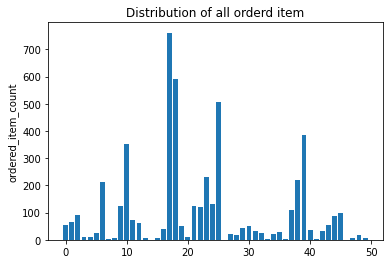

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()

# x 축에 들어갈 상품 인덱스
x_pos = np.arange(len(item_name_list)) 
order_cnt = item_quantity.values.tolist()
 
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')
 
plt.show()

-----

### `[미니 퀴즈 - 1.1]`
- `pandas에서 유용하게 사용되는 함수 value_counts()와 unique()의 차이점은 무엇일까요?` 
    - 각 함수는 어떤 데이터 타입에 적용이 되는지, 어떤 기능을 가지고 있는지, 정확히 어떤 결과값을 반환하는지 실행해봅시다.

In [20]:
print(chipo['item_name'].value_counts()[:10])

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64


In [21]:
print(type(chipo['item_name'].value_counts()))

<class 'pandas.core.series.Series'>


In [22]:
print(chipo['item_name'].unique())

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad' 'Veggie Cris

In [23]:
print(chipo['item_name'])

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object


In [24]:
print(type(chipo['item_name'].unique()))

<class 'numpy.ndarray'>


-----

# <Step3. 데이터 전처리> : 나만의 조력자를 정의하자

### [apply와 lambda 함수를 이용한 데이터 전처리]

In [25]:
print(chipo.info())
print('-------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [26]:
# column 단위 데이터에 apply 함수로 전처리를 적용합니다.
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [27]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

-----

# <Step4. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색

##### 데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기


- 주문당 평균 계산금액 출력하기
- 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
- “Veggie Salad Bowl”이 몇 번 주문되었는지 구하기
- “Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기
-----

### [주문당 평균 계산금액 출력하기]

In [28]:
# 주문당 평균 계산금액을 출력합니다.
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [88]:
chipo.groupby('order_id')['item_price'].sum()

order_id
1       $2.39 $3.39 $3.39 $2.39 
2                        $16.98 
3                  $10.98 $1.69 
4                  $11.75 $9.25 
5                   $9.25 $4.45 
                  ...           
1830              $11.75 $11.25 
1831          $9.25 $2.15 $1.50 
1832                $8.75 $4.45 
1833              $11.75 $11.75 
1834         $11.25 $8.75 $8.75 
Name: item_price, Length: 1834, dtype: object

In [29]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

-----

### [한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기]

In [30]:
# 한 주문에 10달러 이상 사용한 id를 출력합니다.
chipo_orderid_group = chipo.groupby('order_id').sum()
print(chipo_orderid_group)
print(type(chipo_orderid_group))
print('-------------------------')
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
...            ...         ...
995              3       24.95
996              4       43.00
997              2       22.50
998              2       10.88
999              5       29.25

[1834 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
-------------------------
          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


In [31]:
print(chipo.item_price)

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64


-----

### [각 아이템의 가격 구하기]

In [90]:
# 각 아이템의 가격을 계산합니다.
# chipo_one_item = chipo[chipo.quantity == 1]
# chipo_one_item = chipo
price_per_item = chipo.groupby('item_name').min()['item_price']
print(price_per_item)
# price_per_item.sort_values(by = "item_price", ascending = False)[:10]

item_name
6 Pack Soft Drink                        $12.98 
Barbacoa Bowl                            $11.48 
Barbacoa Burrito                         $11.08 
Barbacoa Crispy Tacos                    $11.48 
Barbacoa Salad Bowl                      $11.89 
Barbacoa Soft Tacos                      $11.48 
Bottled Water                             $1.09 
Bowl                                     $22.20 
Burrito                                   $7.40 
Canned Soda                               $1.09 
Canned Soft Drink                         $1.25 
Carnitas Bowl                            $11.08 
Carnitas Burrito                         $11.08 
Carnitas Crispy Tacos                    $11.75 
Carnitas Salad                            $8.99 
Carnitas Salad Bowl                      $11.89 
Carnitas Soft Tacos                      $11.75 
Chicken Bowl                             $10.58 
Chicken Burrito                          $10.58 
Chicken Crispy Tacos                     $10.98 
Chicken Sa

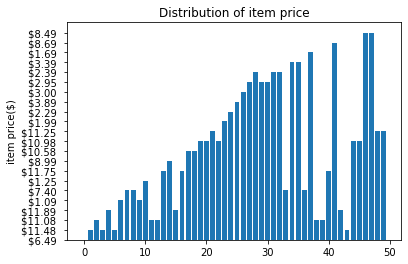

In [76]:
# 아이템 가격 분포 그래프를 출력합니다.
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
 
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
 
plt.show()

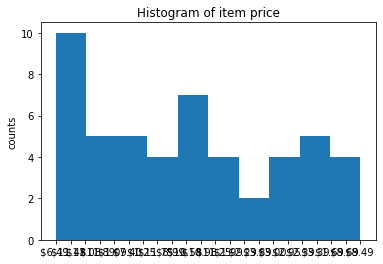

In [77]:
# 아이템 가격 히스토그램을 출력합니다.
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

-----

### [가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기]

In [35]:
# 가장 비싼 주문에서 item이 총 몇개 팔렸는지를 계산합니다.
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


-----

### [“Veggie Salad Bowl”이 몇 번 주문되었는지 구하기]

In [36]:
# “Veggie Salad Bowl”이 몇 번 주문되었는지를 계산합니다.
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
# 한 주문 내에서 중복 집계된 item_name을 제거합니다.
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id']) 
print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


-----

### [“Chicken Bowl”을 2개 이상 주문한 주문 횟수 구하기]
#### 공지사항
- `'Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기` 문제의 출제 의도 오류가 있었습니다. 원래의 의도는 `'Chicken Bowl'을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴에 대한 총 주문 수량`에 대한 문제였습니다. 이슈를 제기해주신 장기식님께 감사드립니다.
- 따라서, 현재 문제의 의도대로 코드를 변경하였습니다. 기존의 출제 의도`“Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴에 대한 총 주문 수량`에 대한 코드는 아래에 추가해두었습니다.

In [37]:
# “Chicken Bowl”을 2개 이상 주문한 것을 조건문으로 필터링
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]

# 해당 df 에서 row 만 뽑아내기..?
print(chipo_chicken_result.shape[0])

33


In [40]:
Chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result.shape)

(33, 5)


In [70]:
# “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]

# 양의 총합을 나타내는 df 를 만든 후 그 중 값이 2 이상인 것 조건문
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
2      2
34     2
70     2
93     2
124    3
Name: quantity, dtype: int64

In [43]:
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64